# Pricing of Early Exercise Options

## Introduction 

First of all we import numpy and matplotlib under the names np and plt,
respectively, as this is very common in the Python scientific computing
community and a good programming habit.

In [1]:
%matplotlib inline

import math
import scipy
import numpy             as np
import pandas            as pd
import scipy.stats       as ss
import matplotlib
import pylab

from pylab import *
from matplotlib import pyplot as pl

# local module
from gdl_finance.analytic import BlackScholes
from gdl_finance.trees    import binomial_tree

Let's start with a quick review of the problem of early exercise. First of all take a look at a very well known plot, the graph of the european option price from the Black and Scholes model...

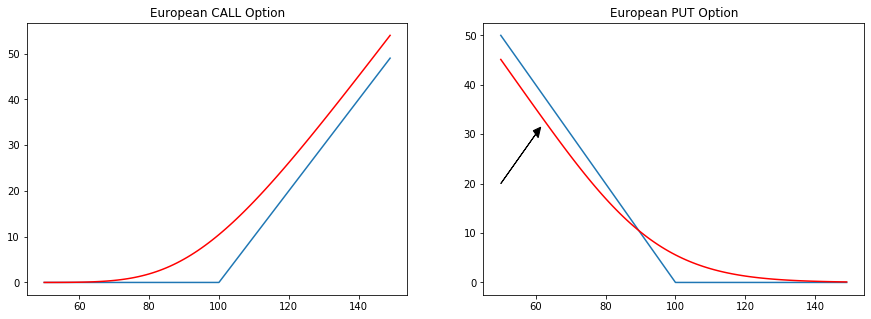

In [2]:
K     = 100.0   # strike price
T     =   1     # time-to-maturity
r     =   0.05  # short rate
sigma =   0.20  # volatility
delta =   0.0   # dividend yield

S      = np.arange(50, 150, 1.0)
C      = BlackScholes(1, S, K, r, delta, sigma, T)
P      = BlackScholes(-1, S, K, r, delta, sigma, T)
payC   = np.maximum(S-K,0)
payP   = np.maximum(K-S,0)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('European CALL Option')
plt.plot(S,payC)
plt.plot(S,C,color='r')

plt.subplot(122)
plt.title('European PUT Option')
plt.arrow(50,20,10,10,head_width=2, head_length=2, fc='k', ec='k')
plt.plot(S,payP)
plt.plot(S,P, color='r')


This figure show that before expiry there is a large range of asset values $S$ for which the value of a European Put Option is less than its intrinsic value (the payoff function). Suppose that $S$ lies in this range, so that $P(S,T) < max(K-S,0)$, and consider the effect of exercising the option. There is an obvious arbitrage opportunity: **we can buy the asset in the market for $S$ and, at the same time we buy the option for $P$**.If we immediately exercise the option by selling the asset for K we thereby make a risk-free profit because $K-S > P \Rightarrow K-S-P > 0$. Of course such an opportunity would not last long before the value of the option was pushed up by the demand of arbitrages. We conclude that when early exercise is permitted we must impose the constraint

$$
P(S,t) \ge max(K-S,0)
$$

American and European Put Options must therefore have different values.

A second example of an American option whose differes from that of its European equivalent is a call option on a dividend-paying asset. 

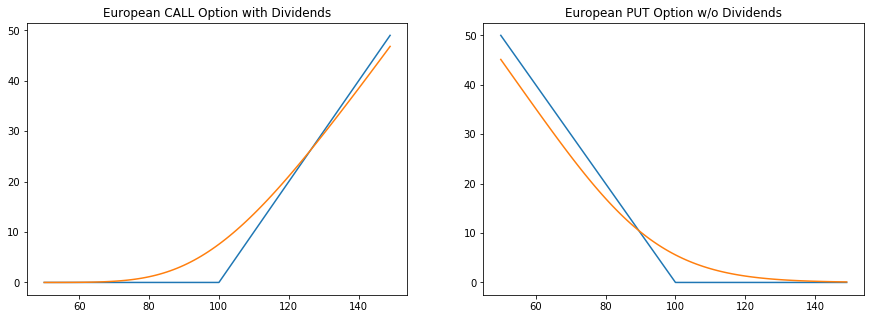

In [3]:
delta  =   0.05  # dividend yield
r      =   0.05

S      = np.arange(50, 150, 1.0)
C      = BlackScholes(1, S, K, r, delta, sigma, T)
P      = BlackScholes(-1, S, K, r, 0.0, sigma, T)
payC   = np.maximum(S-K,0)
payP   = np.maximum(K-S,0)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('European CALL Option with Dividends')
plt.plot(S,payC)
plt.plot(S,C)

plt.subplot(122)
plt.title('European PUT Option w/o Dividends')
plt.plot(S,payP)
plt.plot(S,P)


As we can see an arbitrage argument as above can be used to show that the American version of this option must also be more valuable than the European version since it must satisfy the constraint

$$
C(S,t) \ge max(S-K,0)
$$



## The Problem of Early Exercise ##

### Optimal Stopping Time ###

The valuation of early-exercisable options, or American style options, is a task of major importance in derivatives pricing because these types of instruments are found in all major financial markets including equity, commodity, foreign exchange, credit and convertible. Even though some authors presented analytical approximations for certain early-exercisable options, exact closed-form solutions are in general not existent for these instruments. 

Let's formulate exactly the problem of the early exercise in order to understand what is the main difficulty in finding the solution of the evaluation problem.

American type derivative securities contain implicit or explicit options which **can be exercised before expiration date if desired**.

Consider an American option written on a stock. The option can be exercised at any time between the present date $t=0$ and time to maturity $t=T$. **The holder will exercise this option if he thinks that it is better to do so, rather than waiting until expiration**. The right of early exercise may have some additional value and pricing methods for American style securities must take this into account.

Let $\tau \in [0,T]$ represents the early exercise date. Given the information set at time $t$, $I_t$ , we will be able to tell whether the option has already been exercised or not. The problem is that with American type securities $\tau$ is in general random. 

The option price may be described by a generic function $F(S_t, t)$. In the most simple framework, the underlying stock price is assumed to behaves in continuous time as a geometric Brownian motion

\begin{equation}
dS = \mu S \> dt + \sigma S \> dz
\end{equation}

and, as we already known, the price of the derivative can be expressed using the risk neutral $Q$, **but this time the option holder does not have to wait until expiration $T$ to exercise the option. He will exercise the option as soon as it is more profitable to do so**. If the option is exercised at a generic time $\tau$ its value at $t$ would be

\begin{equation}
F(S_t, t) = E^Q_t \left[ e^{-r(\tau-t)} max\left(S_\tau - K,0 \right) \right]
\end{equation}

Therefore the pricing problem at time $t=0$ becomes the calculation of

\begin{equation}
F(S_0, 0) = \sup\limits_{\tau \in [0, T]} 
\left\{
E^Q_0 \left[ e^{-r\tau} max\left(S_\tau - K,0 \right) \right]
\right\}
\end{equation}

This supremum is achieved by an optimal stopping time $\tau^\star$ that has the form

\begin{equation}
\tau^\star = \inf \left\{ t \ge 0: S_t \ge b^\star_t \right\}
\end{equation}

for some optimal exercise boundary $b^\star$.

![caption](optimal_exercise_boundary.png)

**Figure 1**: *The optimal exercise boundary and a stock price trajectory and its corresponding $\tau^\star$, the ﬁrst time it goes below $b^\star$*

**Since the asset price at which the early exercise is optimal isn’t known in advance it has to be found as part of the solution problem**.

For this reason an analytic solution to the problem does not exist except for very special cases. Thus the general practice is to implement numerical procedures to generate accurate estimates of the option price

### Stopping Rules ###


Any *stopping time* $\tau$ results in a value

\begin{equation}
V_0^\tau \left( S_0 \right) = E \left[ h_\tau \left( S_\tau \right) \right]
\end{equation}

where $h_t \left( S_t \right)$ is the option payoff.  On the other hand, if we assign any values $\hat V_i (s)$ to the option on each of the time states (with the final condition that $\hat V_T = h_T(S_T)$), we can make a stopping rule as

\begin{equation}
\tau^\star = \min \left\{ i \in \{1,\dots,n\}: 
h_i(S_i) \ge \hat V_i(S_i) \right\}
\end{equation}

**In other words we exercise the option when the payoﬀ from exercising, $h_i(S_i)$ is higher than what we expect to gain if we continue (continuation values)**. The continuation values are the values of holding the option rather than exercising it. The problem is, as before, that in general we do not known in advance what is the continuation values. As we have already said this is, in general, part of the problem we are dealing with. 

### Strengths and weaknesses of different computational methods ###

The primary methods for pricing such derivatives are binomial trees, finite difference and LS-Montecarlo methods. 

The tree method discretizes the solution space although the discretization is chosen to represent the distribution of the underlying stock price process, instead of the entire solution space. 

The finite difference method estimates the solution of a partial differential equation (PDE) by discretizing the solution space into a grid and then solving the PDE by recursion. 

The **shortcoming** is that **these techniques become computationally prohibitive when they are generalized to handle multiple dimensions**, with computation time typically increasing exponentially with the number of state variables.

Usually both these procedures start from the maturity date and then go **backward** toward time zero. In doing this they construct a hedging portfolio that perfectly replicates the payoffs in the future and finally set the option price equal to the value of the hedging portfolio at time zero. Working backwards in time starting from the expiration date, the optimal exercise strategy and the price of the options can be easily estimated, so a **strength of tree and finite difference methods is that they can handle easily the early exercise feature of american products**.

The use of simulation methods in security pricing may offer a number of decisive advantages. First of all **the convergence rate of the Monte Carlo approach is independent of the number of state variables** which makes the method computationally appealing for solving high-dimensional problems. Moreover the method is flexible with respect to the evolution of the state variables offering the opportunity to price derivative securities with more complex process dynamics. At the end path dependency features can easily be incorporated in a Monte Carlo pricing framework. On the other hand, **the major drawback of simulation procedures is the difficulty in dealing with the early exercise feature of American options**. 

In particular, standard simulation procedures are **forward** algorithms, that is, the trajectories of the state variables are simulated forward in time. Then, given a pre-specified exercise policy, a path price is determined for each trajectory. The average of path prices gives an unbiased estimate of the derivative security price.  

### Forward Algorithm ###

The approach is easy and intuitive: We simulate $n$ random trajectories using time discretization. Then we compute the value of the option in each trajectory and get an average on all of them, leading to an estimated value of the European option.

In [4]:
#np.random.seed(150000)
# Model Parameters
S0    =  70.0   # initial stock level
K     = 100.0   # strike price
T     =   1.0   # time-to-maturity
r     =   0.01  # short rate
sigma =   0.20  # volatility
delta =   0.0   # dividend yield

# Simulation Parameters
b = 10000    # number of paths
M = 100      # number of points for each path
dt = float(T) / float(M)
df = math.exp(-r * dt)
#
# Random numbers generations. We use the function 'randn' which returns 
# a sample (or samples) from the "standard normal" distribution.
# If positive, int_like or int-convertible arguments are provided,
# 'randn' generates an array of shape (d0, d1, ..., dn), filled
# with random floats sampled from a univariate "normal" (Gaussian)
# distribution of mean 0 and variance 1
#
z1  = np.random.randn(M + 1, b)
#
# Stock Price Paths. The function 'cumsum' returns the cumulative sum 
# of the elements along a given axis, in this case we want to sum along
# the time axis (axis=0). Note that since z1 is a 2D-array also S is
# a 2D-array
#
S     = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
       + sigma * math.sqrt(dt) * z1, axis=0))
S[0]  = S0

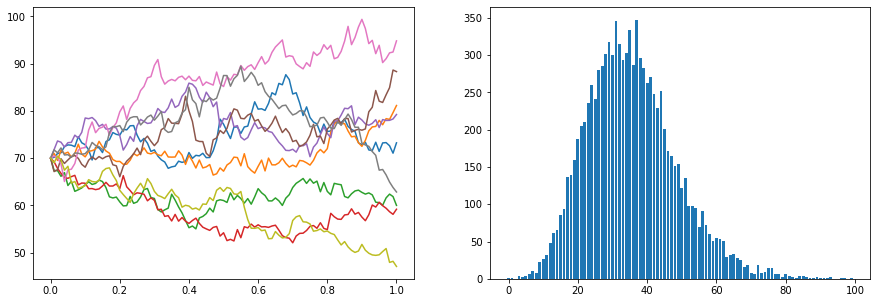

In [5]:
# plotting the first n paths
t = np.linspace(0, T, M+1)
paths = S[:,0:9]
#
# plotting expiry price distribution. Note that the S matrix is build 
# with the first index running on the time slice and the second index
# running on the number of simulated path. Remember that Python programming 
# language supports negative indexing of arrays, something which is not 
# available in arrays in most other programming languages. This means that 
# the index value of -1 gives the last element, and -2 gives the second 
# last element of an array. The negative indexing starts from where the 
# array ends. So in this case we are selecting all the simulated value 
# (second index = ':') of the last simulated time (first index = '-1').
#
expiry = S[-1,:]
hist = np.histogram(expiry, 100)
index = np.arange(100)

pl.figure(figsize=(15,5))
pl.subplot(121)

strike = np.array([K for n in range(0,M+1)])
#pl.plot(t, strike, color='r', dashes=[6,2], linewidth=3.0)
pl.plot(t, paths)

pl.subplot(122)
pl.bar(index, hist[0])

pl.show()

By contrast, as we have seen, pricing methods for American style derivatives are generally backward algorithms. That is to say, the optimal exercise strategy at maturity is determined and proceeding backward in time dynamic programming determines the optimal exercise strategy and the corresponding price at previous dates. 

**The problem of using simulation methods to price American options stems from the difficulty in applying forward-based procedures to problems that necessitate a backward procedure to be solved**.

All the numerical methods we are dealing with, use time discretization for pricing American put options. So in fact they consider that exercising the option is possible only on a ﬁnite number of times. These kind of options are called Bermudan. So we actually are discussing methods for Bermudan put options. Of course we can recover the case of an American Option choosing time intervals small enough.

# Simulation Approach: The Longstaff-Schwartz Method

## Introduction

The Longstaff-Schwartz algorithm is one of the most popular among practitioners, particularly for the pricing of American options on more than one underlying asset. First of all we will present the general idea behind the method through a simple bermudian option pricing example, then we'll give a more formal presentation.

## The Idea 

As we have seen Monte Carlo simulation is a flexible and powerful numerical method to value financial derivatives of any kind. However being a forward evolving technique, it is per se not suited to address the valuation of American or Bermudan options which are valued in general by backwards induction. Longstaff and Schwartz provide a numerically efficient method to resolve this problem by what they call Least-Squares Monte Carlo. 

As you know, the problem with Monte Carlo is that the decision to exercise an American option or not is dependent on the continuation value. Consider a simulation with $M + 1$ points in time and $I$ paths. Given a simulated index level $S_{t,i} , t\in \{0, ..., T \}, i \in \{1, ..., I \}$, what is the continuation value $C_{t,i}(S_{t,i})$, i.e. the expected payoff of not exercising the option? The approach of Longstaff-Schwartz approximates continuation values for American options in the backwards steps by an ordinary least-squares regression. 

Equipped with such approximations, the option is exercised if the approximate continuation value is lower than the value of immediate exercise. Otherwise it is not exercised.

In order to explain the metodology, let's start from a simpler problem. Consider a *bermudan option* which is similar to an american option, except that it can be early exercised once only on a specific set of dates. In the figure, we can represent the schedule of a put bermudan option with strike $K$ and maturity in $6$ years. Each year you can choose whether to exercise or not.

![caption](bermudan_exercise_1.png)
<!--
<img src="img/lesson_5/bermudan_exercise_1.png" alt="Bermudan Exercise Periods" width="50%" align="center" border="1">
-->

Let's consider a simpler example: a put option which can be exercised early only once:

![caption](bermudan_exercise_2.png)
<!--
<img src="img/lesson_5/bermudan_exercise_2.png" alt="Bermudan Exercise Periods" width="50%" align="center" border="1">
-->

Can we price this product by means of a Monte Carlo? Yes we can! Let's see how.

Let's implement a MC which actually simulates, besides the evolution of the market, what an investor holding this option would do (clearly an investor who lives in the risk neutral world). In the following example we will assume the following data, $S(T)=$, $K=$, $r=$, $\sigma=$, $t_1=1y$, $T=2y$.

We simulate that 1y has passed, computing the new value of the asset and the new value of the money market account

$$S(t_1 = 1y) = S(t_0)e^{(r-\frac{1}{2}\sigma^2 )(t_1-t_0) + \sigma \sqrt{t_1-t_0}N(0,1)}$$

$$B(t_1 = 1y) = B(t_0) e^{r(t_1-t_0)}$$

At this point the investor could exercise. How does he know if it is convenient? In case of exercise he knows exactly the payoff he's getting. In case he continues, he knows that it is the same of having a European Put Option.

So, in mathematical terms we have the following payoff in $t_1$

$$\max \left[
K-S(t_1), P(t_1,T;S(t_1),K)
\right] $$

Where $P(t_1,T;S(t_1),K)$ is the price of a Put which we compute analytically! In the jargon of american products, $P$ is called the continuation value, i.e. the value of holding the option instead of early exercising it.

So the premium of the option is the average of this discounted payoff calculated in each iteration of the Monte Carlo procedure.

$$
\frac{1}{N} \sum\limits_i
\max \left[
K-S_i(t_1), P(t_1,T;S_i(t_1),K)
\right] $$

Some considerations are in order. We could have priced this product because we have an analytical pricing formula for the put. What if we didn't have it? 

Brute force solution: for each realization of $S(t_1)$ we run another Monte Carlo to price the put. This method (called Nested Monte Carlo) is very time consuming. For this very simple case it's time of execution grows as $N^2$, which becomes prohibitive when you deal with more than one exercise date!

Let's search for a finer solution analyzing the relationship between the continuation value (in this very simple example) and the simulated realization of $S$ at step $t_1$. 

In [6]:
# Model Parameters
S0     =  90.0   # initial stock level
K      = 100.0   # strike price
T      =   1.0   # time-to-maturity
r      =   0.00  # short rate
sigma  =   0.20  # volatility
delta  =   0.0   # dividend yield
payout =  -1

# Simulation Parameters
b = 10000   # number of paths
M = 3      # number of points for each path
dt = float(T) / float(M)
df = np.exp(-r * dt)
#
# Random numbers generations. We use the function 'randn' which returns 
# a sample (or samples) from the "standard normal" distribution.
# If positive, int_like or int-convertible arguments are provided,
# 'randn' generates an array of shape (d0, d1, ..., dn), filled
# with random floats sampled from a univariate "normal" (Gaussian)
# distribution of mean 0 and variance 1
#
z1  = np.random.randn(M + 1, b)
#
# Stock Price Paths. The function 'cumsum' returns the cumulative sum 
# of the elements along a given axis, in this case we want to sum along
# the time axis (axis=0)
#
S     = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
       + sigma * np.sqrt(dt) * z1, axis=0))
S[0]  = S0


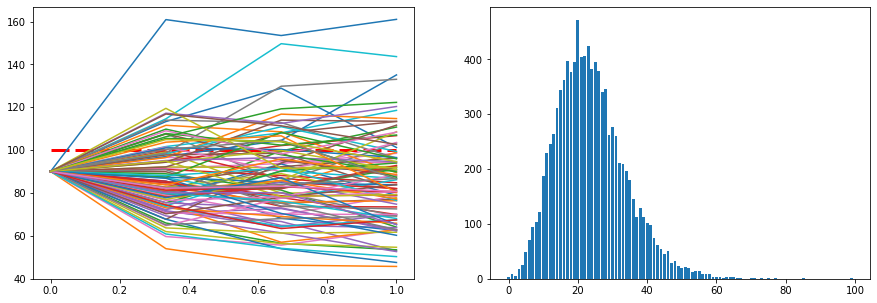

In [7]:
# plotting the first 100 paths
t = np.linspace(0, T, M+1)
paths = S[:,1:100]
#
# plotting expiry price distribution. Note that the S matrix is build 
# with the first index running on the time slice and the second index
# running on the number of simulated path. Remember that Python programming 
# language supports negative indexing of arrays, something which is not 
# available in arrays in most other programming languages. This means that 
# the index value of -1 gives the last element, and -2 gives the second 
# last element of an array. The negative indexing starts from where the 
# array ends. So in this case we are selecting all the simulated value 
# (second index = ':') of the last simulated time (first index = '-1').
#
expiry = S[-1,:]
hist = np.histogram(expiry, 100)
index = np.arange(100)

plt.figure(figsize=(15,5))
plt.subplot(121)

strike = np.array([K for n in range(0,M+1)])
plt.plot(t, strike, color='r', dashes=[6,2], linewidth=3.0)
plt.plot(t, paths)

plt.subplot(122)
plt.bar(index, hist[0])

plt.show()

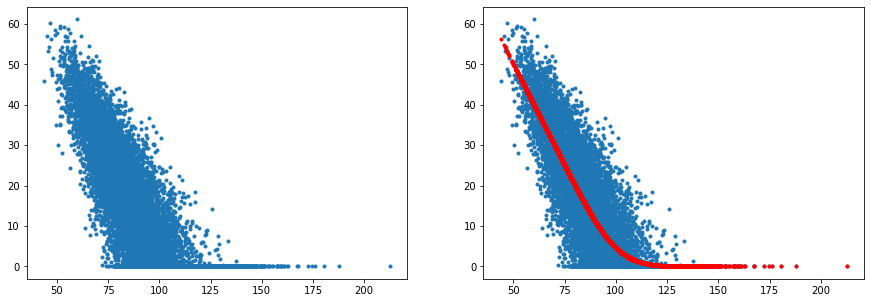

In [8]:
#
# Asset value at T-1
S2 = S[-2,:]
payoff = np.maximum(payout*(expiry-K),0)*np.exp(-r *2*dt)    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(S2, payoff,'.')

O = BlackScholes(payout, S2, K, r, delta, sigma, dt)

plt.subplot(122)
plt.plot(S2, payoff,'.')
plt.plot(S2, O,'.', color='r')
plt.show()

As you can see, the analytical price of the option is a curve which kinds of interpolate the cloud of Monte Carlo points. This suggest us that 

+ **the price at time $t_1$ can be computed by means of an average on all discounted payoff (i.e. the barycentre of the cloud made of discounted payoff)**

So maybe...

+ **the future value of an option can be seen as the problem of finding the curve that best fits the cloud of discounted payoff (up to date of interest)!!!**

Below, for example, there is a curve found by means of a linear regression on a polynomial of 5th order...

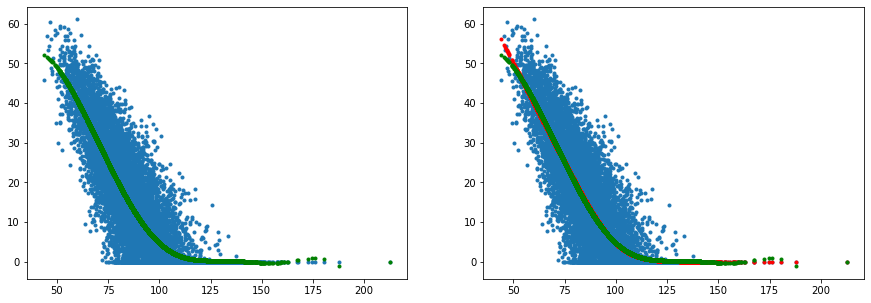

In [10]:
npol = 9
rg   = np.polyfit(S2, payoff, npol)
yy   = np.polyval(rg, S2)

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.plot(S2, payoff,'.')
plt.plot(S2, yy,'.',color='g') 

# And here we see both the curve overlapping (in green the 5th order polynomial and in 
# red the analytical solution of black and scholes model) ...

plt.subplot(122)

plt.plot(S2, payoff,'.')
plt.plot(S2, O, '.', color='r')
plt.plot(S2, yy,'.', color='g')    

We now have an empirical pricing formula for the put to be used in my MCS

$$P(t_1, T, S(t_1), K) = c_0 + c_1S(t_1) + c_2S(t_1)^2 + c_3S(t_1)^3 + c_4S(t_1)^4 + c_5S(t_1)^5$$

The formula is obviously fast, the cost of the algorithm being the best fit. Please note that we could have used any form for the curve (not only a plynomial). This method has the advantage that it can be solved as a linear regression, which is fast.

### Simple Polynomial Interpolation ###

In [11]:
#
# Valuation of American Options
# with Least-Squares Monte Carlo
# 
# American Put Option
#
# Simulation Parameters
I = 100000
M = 25
dt = T / M
df = np.exp(-r * dt)

# Stock Price Paths
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * np.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

# Inner Values
h = np.maximum(payout*(S - K), 0)    

# Present Value Vector (Initialization)
V = h[-1]

# American Option Valuation by Backwards Induction
for t in range(M - 1, 0, -1):
    rg = np.polyfit(S[t], V * df, 5)
    C  = np.polyval(rg, S[t])             # continuation values
    V  = np.where(h[t] > C, h[t], V * df) # exercise decision

V0 = df * np.sum(V) / I  # LSM estimator

print ("American option value %5.3f" % V0)

American option value 13.663


## Least Squares Montecarlo ##

### Approximate Continuation Value ###

Regression based methods posit an expression for  the continuation value of the form

\begin{equation}
    C_i(x) = \mathbb{E} \left[ V_{i+1} \left( X_{i+1} \right)  \vert X_i = x \right]= \sum\limits_{r=1}^M \beta_{ir} \psi_r(x)
\label{eqn:LSM_1}
\end{equation}

for some basis functions $\psi_r : \mathbb{R}^b \rightarrow \mathbb{R}^b$ and constants $\beta_{ir}, r = 1,\dots, M$. We may equivalently write

\begin{equation}
    C_i(x) = \mathbb{\bar \beta}_i^T \mathbb{\bar \psi}(x)
\label{eqn:LSM_2}
\end{equation}

Assuming a relation of the form $\eqref{eqn:LSM_1}$ holds and remembering that the general form  of the least square estimate (or estimator, in the context of a random sample), $\beta$ is given by

\begin{equation}
\beta =(X^{T}X)^{-1}X^{T}{\boldsymbol {y}}
\end{equation}

we can write

\begin{equation}
\beta_i = 
\left( 
\mathbb{E} \left[ \psi\left(X_i\right) \psi\left(X_i\right)^T \right] 
\right)^{-1}
\mathbb{E} \left[ \psi\left(X_i\right) V_{i+1} \left( X_{i+1} \right)  \right] 
\equiv B_\psi^{-1} B_{\psi V}
\label{eqn:LSM_3}
\end{equation}

since we are working with a number $b$ of simulated path, we have to take the expectation values of the matrix products involved. This is why this method is called Least Squares Montecarlo.

The coefficients $\beta_{ir}$ could be estimated from observations of pairs $(X_{ij}, V_{i+1}(X_{i+1,j})) \, j=1,\dots,b$ each consisting of **the state at time $i$ and the corrisponding option value at time $i+1$**.  In practice the least-squares estimate of $\beta_i$ is given by 

\begin{equation}
\hat \beta_i = \hat B_\psi^{-1} \hat B_{\psi V}
\end{equation}

where $\hat B_\psi$ and $\hat B_{\psi V}$ are the sample counterparts of $B_\psi$ and $B_{\psi V}$. More explicitly 

\begin{equation}
\hat B_\psi = \frac{1}{b} \sum\limits_{j=1}^b \psi_q \left( X_{ij} \right)\psi_r \left( X_{ij} \right)
\end{equation}

and

\begin{equation}
\hat B_{\psi V} = \frac{1}{b} \sum\limits_{j=1}^b \psi_r \left( X_{ij} \right) V_{i+1}\left( X_{i+1,j} \right)
\end{equation}

this last formula reminds you of something?

All of these quantities can be calculated from function  values at pairs of consecutive nodes $\left( X_{ij}, X_{i+1,j} \right) \, j=1,\dots,b$. In practive $V_{i+1}$ is unknown and must be replaced by estimated values $\hat V_{i+1}$. The estimate $\hat \beta_i$ then defines an estimate 

\begin{equation}
\hat C_i(x) = \mathbb{\hat \beta}_i^T \mathbb{\psi}(x)
\label{eqn:LSM_4}
\end{equation}

of the continuation value at an arbitrary point $x$ in the state space $\mathbb{R}^b$.

### Regression Based Pricing Algorithm ###

- Simulate $b$ independent paths $\{ X_{1j},\dots,X_{mj}\}\, j= 1,\dots,b$ of the Markov chain ;
- For $t=T$ the option value is $\hat V_{mj} = h_m(X_{mj})\,j= 1,\dots,b$ by arbitrage
- Start iterating backwards: for $i=m-1,\dots,1$:
    - given estimated values $\hat V_{i+1,j}\, j= 1,\dots,b$, use regression as above to calculate $\hat \beta_i = \hat B_\psi^{-1} \hat B_{\psi V}$;
    - set 
    \begin{equation}
    \hat V_{ij} = \max \left[ h_i\left( X_{ij} \right), \hat C_{i} \left( X_{ij} \right) \right] \quad j= 1,\dots,b
    \label{eqn:LSM_5}
    \end{equation}
    with $\hat C_{i}$ given by $\eqref{eqn:LSM_4}$;
- Set $\hat V_0 = \left( \hat V_{11} + \dots + \hat V_{1b} \right)/b$

Longstaff and Scwhartz in their original paper followed a slightly different approach replacing $\eqref{eqn:LSM_5}$ with

\begin{equation}
\hat V_{ij}= 
\begin{cases}
h_i\left( X_{ij} \right) & \quad \text{if } h_i\left( X_{ij} \right) \ge   \hat C_i\left( X_{ij} \right) \quad \text{(exercise takes place)}\\
\hat V_{i+1,j}           & \quad \text{otherwise (no exercise takes place)}\\
\end{cases}
\end{equation}


### A Simple Python Implementation of LSM ###

In [13]:
# Simulation Parameters
b  = 100000                # number of mc simulations
t  = [0.,1./3.,2./3.,1.]   # exercise opportunities
dt = t[1]-t[0]
df = np.exp(-r * dt)

point_estimate  = 0
#
# ----- 1st exercise data -----------------------------------------------
#
z1  = np.random.randn(b)
#
S1 = S0 * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1)
#
# ----- 2nd exercise data -----------------------------------------------
#
z2  = np.random.randn(b)
#
S2 = S1 * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z2)

In [14]:
#
# Time t2 = T - 1
#
# As we have already seen at the penultimate exercise date, the continuation value
# is simply the Black and Scholes pricing for an european option expiring at T 
# with the same parameters of the american option.
#
cont_t2 = BlackScholes(payout, S2, K, r, delta, sigma, 1./3.)  
Vt2     = np.maximum(np.maximum(payout*(S2 - K), 0), cont_t2)

#### Choosing Basis Functions: 1 - Rasmussen (2005) ####

For this implementation we followed Rasmussen (2005) and used the following basis functions:

\begin{align}
&\psi_0(X) = K, \notag\\
&\psi_1(X) = X, \notag\\
&\psi_2(X) = BS(X,t), \notag\\
&\psi_3(X) = X \cdot BS(X,t)
\end{align}

where $K$ is the strike price, $X$ the current asset price and $B(X,t)$ is the Black and Scholes European option price for an option expiring at $T$ with the same parameters as the american option. For each path we build the corresponding set of basis function:

In [15]:
#
# Time t1 = T - 2
#
Yt1 = Vt2 * np.exp(-r*dt)
psi = np.zeros((b, 4))
for i in range(0, b):
    bs_price = BlackScholes(payout, S1[i], K, r, delta, sigma, 2./3.)
    psi[i,0] = K
    psi[i,1] = S1[i]
    psi[i,2] = bs_price
    psi[i,3] = S1[i] * bs_price

Using the array $Y$ which contains the estimation of the option at time step $t_1$ we can calculate beta parameter according to:

\begin{equation}
\hat \beta_i = \hat B_\psi^{-1} \hat B_{\psi V}
\notag
\end{equation}

where $\hat B_\psi$ and $\hat B_{\psi V}$ are the sample counterparts of $B_\psi$ and $B_{\psi V}$. More explicitly 

\begin{equation}
\hat B_\psi = \frac{1}{b} \sum\limits_{j=1}^b \psi_q \left( X_{ij} \right)\psi_r \left( X_{ij} \right) = \Psi^T \cdot \Psi
\notag
\end{equation}

and

\begin{equation}
\hat B_{\psi V} = \frac{1}{b} \sum\limits_{j=1}^b \psi_r \left( X_{ij} \right) V_{i+1}\left( X_{i+1,j} \right) =
\Psi^T \cdot V
\notag
\end{equation}

In [16]:
beta_psi    = np.linalg.inv(np.dot(psi.T, psi))
beta_psi_v  = np.dot(psi.T, Yt1)
beta        = np.dot(beta_psi, beta_psi_v)
cont_t1     = np.dot(psi, beta)

Finally we compute our estimator according to:

\begin{equation}
\hat V_{ij}= 
\begin{cases}
h_i\left( X_{ij} \right) & \quad \text{if } h_i\left( X_{ij} \right) \ge   \hat C_i\left( X_{ij} \right) \quad \text{(exercise takes place)}\\
\hat V_{i+1,j}           & \quad \text{otherwise (no exercise takes place)}\\
\end{cases}
\end{equation}

In [17]:
Vt1 = Vt2 * np.exp(-r*dt)
for i in range(0,b):
    if max(payout*(S1[i]-K),0) >= cont_t1[i]:
        Vt1[i] = max(payout*(S1[i]-K),0)

In [18]:
Vt0 = Vt1 * np.exp(-r*dt)        
    
point_estimate = np.average(Vt0)     

In [19]:
print('branching        = ' + str(b))
print('point estimator  = ' + str("%.3f" % point_estimate))

branching        = 100000
point estimator  = 13.561


#### Choosing Basis Functions: 2 - Longstaff and Schwartz (2001) ####

Longstaff and Schwartz (2001) suggested to use as basis function the Laguerre polynomials:

\begin{align}
&\psi_0(X) = 1, \notag\\
&\psi_1(X) = (1-X), \notag\\
&\psi_2(X) = (1-2X+X^2/2), \notag\\
&\psi_3(X) = (-X^3+9X^2-18X+6)/6
\end{align}


In [67]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [68]:
import numpy             as np

# local module
from gdl_finance.analytic import BlackScholes

In [69]:
# Model Parameters
S0     =  90.0   # initial stock level
K      = 100.0   # strike price
T      =   1.0   # time-to-maturity
r      =   0.00  # short rate
sigma  =   0.20  # volatility
delta  =   0.0   # dividend yield
payout =  -1

# Simulation Parameters
b  = 100000                # number of mc simulations
t  = [0.,1./3.,2./3.,1.]   # exercise opportunities
dt = t[1]-t[0]
df = np.exp(-r * dt)

point_estimate  = 0
#
# ----- 1st exercise data -----------------------------------------------
#
z1  = np.random.randn(b)
#
S1 = S0 * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1)
#
# ----- 2nd exercise data -----------------------------------------------
#
z2  = np.random.randn(b)
#
S2 = S1 * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z2)
#
# Time t2 = T - 1
#
# As we have already seen at the penultimate exercise date, the continuation value
# is simply the Black and Scholes pricing for an european option expiring at T 
# with the same parameters of the american option.
#
cont_t2 = BlackScholes(payout, S2, K, r, delta, sigma, 1./3.)  
Vt2     = np.maximum(np.maximum(payout*(S2 - K), 0), cont_t2)

In [70]:
#
# Time t1 = T - 2
#
Yt1 = Vt2 * np.exp(-r*dt)
psi = np.zeros((b, 4))
for i in range(0, b):
    X        = float(S1[i])
    psi[i,0] = 1
    psi[i,1] = (1-X)
    psi[i,2] = (1 - 2*X + X**2/2.0)
    psi[i,3] = (-X**3 + 9*X**2 - 18*X + 6)/6.0

In [71]:
beta_psi    = np.linalg.inv(np.dot(psi.T, psi))
beta_psi_v  = np.dot(psi.T, Yt1)
beta        = np.dot(beta_psi, beta_psi_v)
cont_t1     = np.dot(psi, beta)

Vt1 = Vt2 * np.exp(-r*dt)
for i in range(0,b):
    if max(payout*(S1[i]-K),0) >= cont_t1[i]:
        Vt1[i] = max(payout*(S1[i]-K),0)
        
Vt0 = Vt1 * np.exp(-r*dt)        
    
point_estimate = np.average(Vt0)             

print('branching        = ' + str(b))
print('point estimator  = ' + str("%.3f" % point_estimate))

branching        = 100000
point estimator  = 13.602


## <span style='color:Blue'> References </span> ##

*Clément E., Lamberton D. and Protter P.*, **An Analysis of the Longstaff Schwartz Algorithm for American Option Pricing**, *Finance and Stochastics, vol. 6, no. 4, pp. 449-471*

*Glasserman P.*, **Monte Carlo Methods in Financial Engineering**, *Springer (2004)*

*Glasserman P. and Yu Bin*, **Number of Paths versus Number of Basis Functions in American Option Pricing**, *The Annals of Applied Probability, 2004, Vol. 14, No. 4, pp. 2090-2119*

*Hull J. C.*, **Option, Futures and Other Derivatives**, *6th Edition, Prentice Hall*

*Wilmott P.*, **Derivatives, The Theory and Practice of Financial Engineering**, *University Edition*

*Wilmott P., Howison S. and Dewinne J.*, **The Mathematics of Financial Derivatives, A Student Introduction**, *Cambridge University Press*

*Woo J., Liu C. and Choi J.*, **Leave-one-out Least Square Monte Carlo Algorithm for Pricing American Options**, *arXiv:1810.02071v2 [q-fin.CP] 25 May 2019*